# Analysis of PES for different sites

First, look at a common site, with a relatively unperturbed latticed.

In [33]:
import sys
sys.path.append('il_pedagogical')
import il_pedagogical as ilp
import il_parse as ila
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

import pandas as pd
pd.options.display.float_format = '{:.0f}'.format

il_morse = ila.Parser('logs/morse_potential_50.json')

In [3]:
active_id = np.argmin(il_morse.true_barrier_heights())
active_height = il_morse.true_barrier_heights()[active_id]
active_coordinates = il_morse.local_coordinates()[active_id]

print(active_id, active_height, active_coordinates[0:2])

8770 50.557915770811405 [1.93742572 2.0673402 ]


In [4]:
normal_id = 53
normal_height = il_morse.true_barrier_heights()[normal_id]
normal_coordinates = il_morse.local_coordinates()[normal_id]

print(normal_height, normal_coordinates[0:2])

83.80975725184635 [2.03539581 2.03145812]


## Normal, incative site

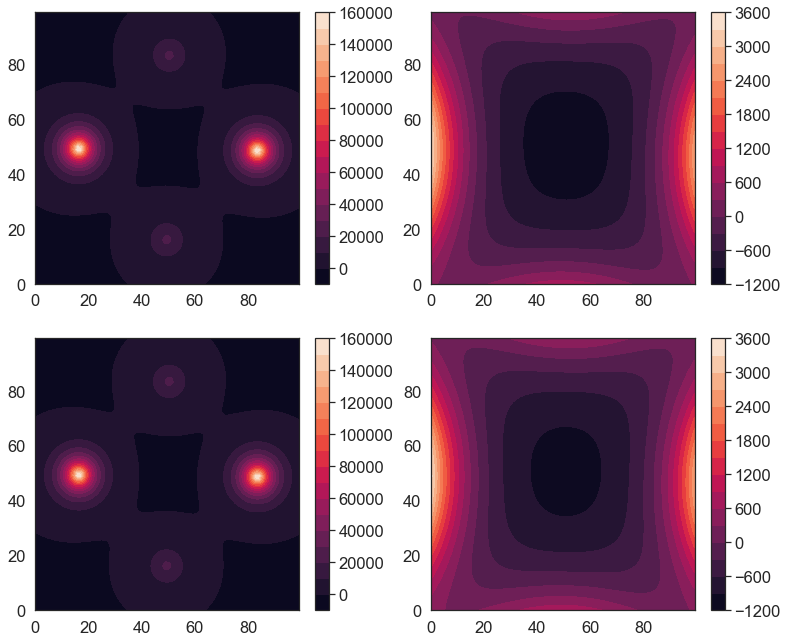

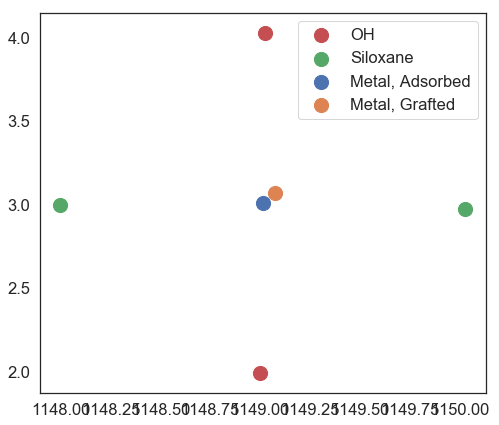

Siloxane distances, 0.961, 1.077
OH distances, 0.960, 1.079
Adsorbed
Siloxane distances, 1.016, 1.016
OH distances, 1.015, 1.020


In [76]:
from potentials import ads_state_pot, bare_metal_pot
morse_MO = {'D': 500.0, 'a': 2.1, 'r_eq': 1.0}
morse_M_O = {'D': 55.0, 'a': 3.5, 'r_eq': 1.16}
S1 = np.asarray([1149.02575486, 4.02592911])
S2 = np.asarray([1150.02829774,    2.97326395])
S3 = np.asarray([1148.99681236,    1.99073908])
S4 = np.asarray([1147.99695714,    2.99511425])

x = np.linspace(1147.5, 1150.5, 100)
y = np.linspace(1.5, 4.5, 100)

y2 = np.linspace(2.5, 3.5, 100)
x2 = np.linspace(1148.5, 1149.5, 100)


X, Y = np.meshgrid(x, y)
X2, Y2 = np.meshgrid(x2, y2)

Z1 = np.zeros((100,100))
Z2 = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        Z[i, j] = bare_metal_pot((X[i, j], Y[i, j]), morse_MO, morse_M_O, S1, S2, S3, S4)
        Z2[i, j] = bare_metal_pot((X2[i, j], Y2[i, j]), morse_MO, morse_M_O, S1, S2, S3, S4)

fig, axes = plt.subplots(2, 2, figsize=(13,11))        
A = axes[0,0].contourf(Z, levels=15)
B = axes[0,1].contourf(Z2, levels=15)

fig.colorbar(A, ax=axes[0, 0])
fig.colorbar(B, ax=axes[0, 1])

Z1 = np.zeros((100,100))
Z2 = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        Z[i, j] = ads_state_pot((X[i, j], Y[i, j]), morse_MO, morse_M_O, S1, S2, S3, S4)
        Z2[i, j] = ads_state_pot((X2[i, j], Y2[i, j]), morse_MO, morse_M_O, S1, S2, S3, S4)

A = axes[1,0].contourf(Z, levels=15)
B = axes[1,1].contourf(Z2, levels=15)

fig.colorbar(A, ax=axes[1, 0])
fig.colorbar(B, ax=axes[1, 1])
plt.show()

# print(Z[50,18])

fig, axes = plt.subplots(1, 1, figsize=(8,7))  
axes.scatter(np.vstack((S1,S3))[:,0], np.vstack((S1,S3))[:,1], s=200, c='r', label='OH')
axes.scatter(np.vstack((S2,S4))[:,0], np.vstack((S2,S4))[:,1], s=200, c='g', label='Siloxane')
axes.scatter(1149.0128834118857, 3.011103111303015, s=200, label="Metal, Adsorbed")
axes.scatter(1149.0718745998397, 3.0667808394237266, s=200, label="Metal, Grafted")
plt.legend()
plt.show()

ads_x = np.asarray([1149.0128834118857, 3.011103111303015])
graft_x = np.asarray([1149.0718745998397, 3.0667808394237266])

print('Siloxane distances, {:.3f}, {:.3f}'.format(norm(S2 - graft_x), norm(S4 - graft_x)))
print('OH distances, {:.3f}, {:.3f}'.format(norm(S1 - graft_x), norm(S3 - graft_x)))
print("Adsorbed")
print('Siloxane distances, {:.3f}, {:.3f}'.format(norm(S2 - ads_x), norm(S4 - ads_x)))
print('OH distances, {:.3f}, {:.3f}'.format(norm(S1 - ads_x), norm(S3 - ads_x)))

## Rare, active site

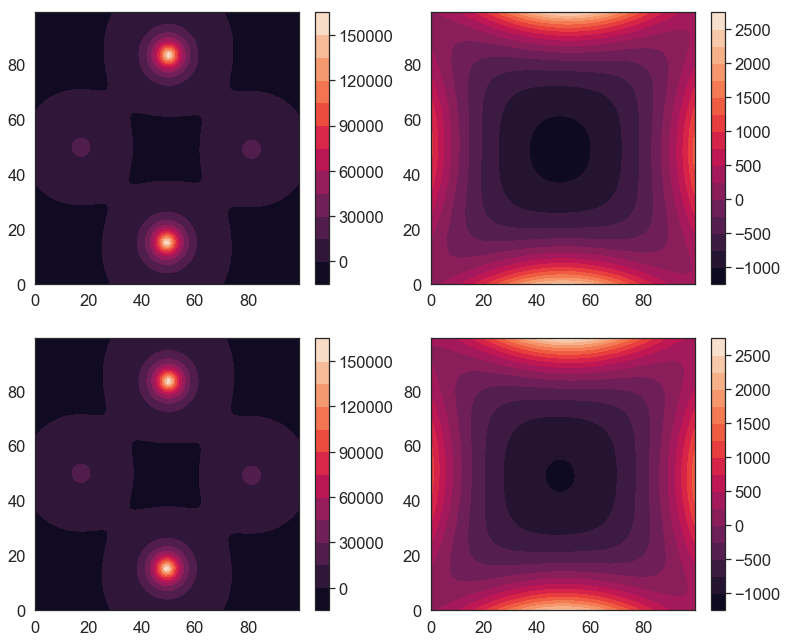

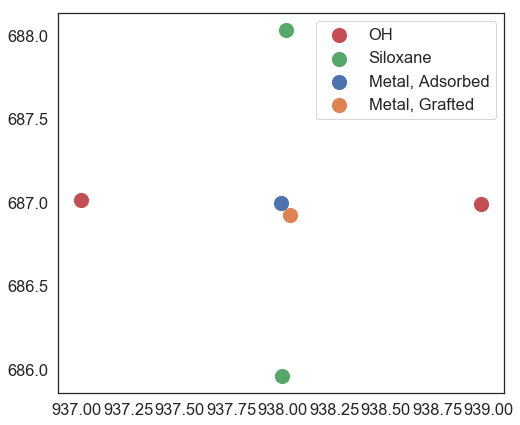

Grafted
Siloxane distances, 0.966, 1.102
OH distances, 0.925, 1.018
Adsorbed
Siloxane distances, 1.034, 1.034
OH distances, 0.970, 0.968


In [77]:
S1 = np.asarray([938.96027199, 686.99060164])
S2 = np.asarray([937.99864584, 685.9618165 ])
S3 = np.asarray([937.0229564 , 687.01125889])
S4 = np.asarray([938.01692496, 688.02907589])

x = np.linspace(936.5, 939.5, 100)
y = np.linspace(685.5, 688.5, 100)

x2 = np.linspace(937.5, 938.5, 100)
y2 = np.linspace(686.5, 687.5, 100)

X, Y = np.meshgrid(x, y)
X2, Y2 = np.meshgrid(x2, y2)

Z1 = np.zeros((100,100))
Z2 = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        Z[i, j] = bare_metal_pot((X[i, j], Y[i, j]), morse_MO, morse_M_O, S1, S2, S3, S4)
        Z2[i, j] = bare_metal_pot((X2[i, j], Y2[i, j]), morse_MO, morse_M_O, S1, S2, S3, S4)

fig, axes = plt.subplots(2, 2, figsize=(13,11))        
A = axes[0,0].contourf(Z, levels=15)
B = axes[0,1].contourf(Z2, levels=15)

fig.colorbar(A, ax=axes[0, 0])
fig.colorbar(B, ax=axes[0, 1])

Z1 = np.zeros((100,100))
Z2 = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        Z[i, j] = ads_state_pot((X[i, j], Y[i, j]), morse_MO, morse_M_O, S1, S2, S3, S4)
        Z2[i, j] = ads_state_pot((X2[i, j], Y2[i, j]), morse_MO, morse_M_O, S1, S2, S3, S4)

A = axes[1,0].contourf(Z, levels=15)
B = axes[1,1].contourf(Z2, levels=15)

fig.colorbar(A, ax=axes[1, 0])
fig.colorbar(B, ax=axes[1, 1])
plt.show()





fig, axes = plt.subplots(1, 1, figsize=(8,7))  
axes.scatter(np.vstack((S1,S3))[:,0], np.vstack((S1,S3))[:,1], s=200, c='r', label='OH')
axes.scatter(np.vstack((S2,S4))[:,0], np.vstack((S2,S4))[:,1], s=200, c='g', label='Siloxane')
axes.scatter(937.990532708276, 686.9953703085114, s=200, label="Metal, Adsorbed")
axes.scatter(938.037189231238, 686.9268367995231, s=200, label="Metal, Grafted")
plt.legend()
plt.show()


ads_x = np.asarray([937.990532708276, 686.9953703085114])
graft_x = np.asarray([938.037189231238, 686.9268367995231])

print("Grafted")
print('Siloxane distances, {:.3f}, {:.3f}'.format(norm(S2 - graft_x), norm(S4 - graft_x)))
print('OH distances, {:.3f}, {:.3f}'.format(norm(S1 - graft_x), norm(S3 - graft_x)))
print("Adsorbed")
print('Siloxane distances, {:.3f}, {:.3f}'.format(norm(S2 - ads_x), norm(S4 - ads_x)))
print('OH distances, {:.3f}, {:.3f}'.format(norm(S1 - ads_x), norm(S3 - ads_x)))